In [316]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
import plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object
from sklearn.metrics import mean_squared_error
from scipy.signal import periodogram

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
# import warnings library
import warnings        
# ignore filters
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot')

In [49]:
aerial = pd.read_csv('WW2_data/operations.csv')
weather_station_location = pd.read_csv('WW2_data/Weather Station Locations.csv')
weather = pd.read_csv('WW2_data/Summary of Weather.csv', parse_dates = ['Date'])

In [27]:
aerial

Mission ID Mission Date Theater of Operations      Country Air Force  \
0                1    8/15/1943                   MTO          USA     12 AF   
1                2    8/15/1943                   PTO          USA      5 AF   
2                3    8/15/1943                   MTO          USA     12 AF   
3                4    8/15/1943                   MTO          USA     12 AF   
4                5    8/15/1943                   PTO          USA      5 AF   
...            ...          ...                   ...          ...       ...   
178276      178738    2/16/1945                   CBI          USA     10 AF   
178277      178739    2/16/1945                   CBI          USA     10 AF   
178278      178740    2/16/1945                   CBI          USA     10 AF   
178279      178741    2/16/1945                   PTO  NEW ZEALAND     RNZAF   
178280      178742    2/16/1945                   CBI          USA     10 AF   

                      Unit ID Aircraft Series Callsign Mission Type  \
0               27 FBG/86 FBG             A36      NaN          NaN   
1                      400 BS             B24      NaN            1   
2               27 FBG/86 FBG             A36      NaN          NaN   
3               27 FBG/86 FBG             A36      NaN          NaN   
4                      321 BS             B24      NaN            1   
...                       ...             ...      ...          ...   
178276                  89 FS             P47      NaN         10.0   
178277                  90 FS             P47      NaN         10.0   
178278                  90 FS             P47      NaN         10.0   
178279  NO. 22 SQUADRON RNZAF             F4U      NaN          NaN   
178280                  59 FS             P47      NaN         10.0   

                Takeoff Base  ... Incendiary Devices Weight (Tons)  \
0       PONTE OLIVO AIRFIELD  ...                              NaN   
1                        NaN  ...                              NaN   
2       PONTE OLIVO AIRFIELD  ...                              NaN   
3       PONTE OLIVO AIRFIELD  ...                              NaN   
4                        NaN  ...                              NaN   
...                      ...  ...                              ...   
178276                   NaN  ...                              NaN   
178277                   NaN  ...                              NaN   
178278                   NaN  ...                              NaN   
178279                   NaN  ...                              NaN   
178280                   NaN  ...                              NaN   

       Fragmentation Devices  Fragmentation Devices Type  \
0                        NaN                         NaN   
1                        NaN                         NaN   
2                        NaN                         NaN   
3                        NaN                         NaN   
4                        NaN                         NaN   
...                      ...                         ...   
178276                   NaN                         NaN   
178277                   NaN                         NaN   
178278                   NaN                         NaN   
178279                   NaN                         NaN   
178280                   NaN                         NaN   

       Fragmentation Devices Weight (Pounds)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   
...                                      ...   
178276                                   NaN   
178277                                   NaN   
178278                                   NaN   
178279                                   NaN   
178280                                   NaN   

       Fragmentation Devices Weight (Tons) Total Weight

In [51]:
weather

STA       Date Precip  WindGustSpd    MaxTemp    MinTemp   MeanTemp  \
0       10001 1942-07-01  1.016          NaN  25.555556  22.222222  23.888889   
1       10001 1942-07-02      0          NaN  28.888889  21.666667  25.555556   
2       10001 1942-07-03   2.54          NaN  26.111111  22.222222  24.444444   
3       10001 1942-07-04   2.54          NaN  26.666667  22.222222  24.444444   
4       10001 1942-07-05      0          NaN  26.666667  21.666667  24.444444   
...       ...        ...    ...          ...        ...        ...        ...   
119035  82506 1945-12-27      0          NaN  28.333333  18.333333  23.333333   
119036  82506 1945-12-28  9.906          NaN  29.444444  18.333333  23.888889   
119037  82506 1945-12-29      0          NaN  28.333333  18.333333  23.333333   
119038  82506 1945-12-30      0          NaN  28.333333  18.333333  23.333333   
119039  82506 1945-12-31      0          NaN  29.444444  17.222222  23.333333   

       Snowfall PoorWeather  YR  ...  FB  FTI ITH  PGT  TSHDSBRSGF  SD3  RHX  \
0           0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN   
1           0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN   
2           0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN   
3           0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN   
4           0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN   
...         ...         ...  ..  ...  ..  ...  ..  ...         ...  ...  ...   
119035      0.0         NaN  45  ... NaN  NaN NaN  NaN         NaN  NaN  NaN   
119036      0.0         1.0  45  ... NaN  NaN NaN  NaN         1.0  NaN  NaN   
119037      0.0         1.0  45  ... NaN  NaN NaN  NaN         1.0  NaN  NaN   
119038      0.0         NaN  45  ... NaN  NaN NaN  NaN         NaN  NaN  NaN   
119039      0.0         NaN  45  ... NaN  NaN NaN  NaN         NaN  NaN  NaN   

        RHN RVG  WTE  
0       NaN NaN  NaN  
1       NaN NaN  NaN  
2       NaN NaN  NaN  
3       NaN NaN  NaN  
4       NaN NaN  NaN  
...     ...  ..  ...  
119035  NaN NaN  NaN  
119036  NaN NaN  NaN  
119037  NaN NaN  NaN  
119038  NaN NaN  NaN  
119039  NaN NaN  NaN  

[119040 rows x 31 columns]

In [59]:
aerial.columns

Index(['Mission ID', 'Mission Date', 'Theater of Operations', 'Country',
       'Air Force', 'Unit ID', 'Aircraft Series', 'Callsign', 'Mission Type',
       'Takeoff Base', 'Takeoff Location', 'Takeoff Latitude',
       'Takeoff Longitude', 'Target ID', 'Target Country', 'Target City',
       'Target Type', 'Target Industry', 'Target Priority', 'Target Latitude',
       'Target Longitude', 'Altitude (Hundreds of Feet)', 'Airborne Aircraft',
       'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
       'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
       'High Explosives', 'High Explosives Type',
       'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
       'Incendiary Devices', 'Incendiary Devices Type',
       'Incendiary Devices Weight (Pounds)',
       'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
       'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
       'Fragmentation Devices Weight (Tons)', 'To

In [63]:
aerial = aerial[aerial['Country'].isna() == False]
aerial = aerial[aerial['Target Longitude'].isna() == False]
aerial = aerial[aerial['Takeoff Longitude'].isna() == False]

aerial.shape

(2942, 46)

In [67]:
# drop unused features
drop_list = ['Mission ID','Unit ID','Target ID','Altitude (Hundreds of Feet)','Airborne Aircraft',
             'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
             'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
             'High Explosives', 'High Explosives Type','Mission Type',
             'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
             'Incendiary Devices', 'Incendiary Devices Type',
             'Incendiary Devices Weight (Pounds)',
             'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
             'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
             'Fragmentation Devices Weight (Tons)', 'Total Weight (Pounds)',
             'Total Weight (Tons)', 'Time Over Target', 'Bomb Damage Assessment','Source ID']

aerial.drop(drop_list, axis=1,inplace = True)

aerial = aerial[ aerial.iloc[:,8]!="4248"] # drop this takeoff latitude 
aerial = aerial[ aerial.iloc[:,9]!=1355]   # drop this takeoff longitude

In [69]:
aerial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2555 entries, 0 to 178080
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mission Date           2555 non-null   object 
 1   Theater of Operations  2555 non-null   object 
 2   Country                2555 non-null   object 
 3   Air Force              2505 non-null   object 
 4   Aircraft Series        2528 non-null   object 
 5   Callsign               10 non-null     object 
 6   Takeoff Base           2555 non-null   object 
 7   Takeoff Location       2555 non-null   object 
 8   Takeoff Latitude       2555 non-null   object 
 9   Takeoff Longitude      2555 non-null   float64
 10  Target Country         2499 non-null   object 
 11  Target City            2552 non-null   object 
 12  Target Type            602 non-null    object 
 13  Target Industry        81 non-null     object 
 14  Target Priority        230 non-null    object 
 15  Target 

In [71]:
weather_station_location = weather_station_location.loc[:,["WBAN","NAME","STATE/COUNTRY ID","Latitude","Longitude"] ]
weather_station_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WBAN              161 non-null    int64  
 1   NAME              161 non-null    object 
 2   STATE/COUNTRY ID  161 non-null    object 
 3   Latitude          161 non-null    float64
 4   Longitude         161 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.4+ KB


In [73]:
weather = weather.loc[:,["STA","Date","MeanTemp"] ]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   STA       119040 non-null  int64         
 1   Date      119040 non-null  datetime64[ns]
 2   MeanTemp  119040 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.7 MB


<Axes: xlabel='count', ylabel='Country'>

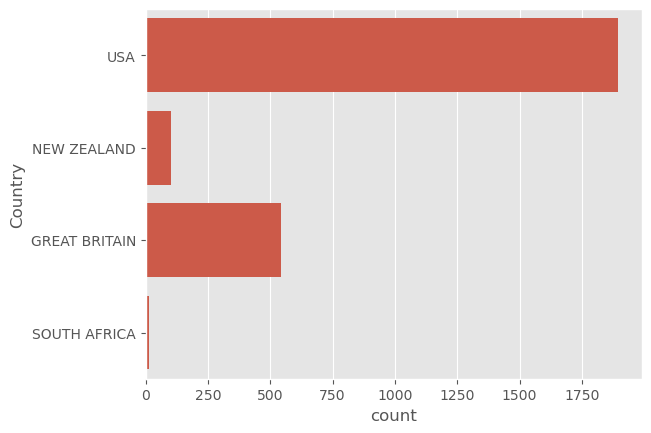

In [89]:
'''sns.histplot(
    data = aerial,
    x = 'Country',
)'''

sns.countplot(aerial['Country'])


<Axes: xlabel='Count', ylabel='Target Country'>

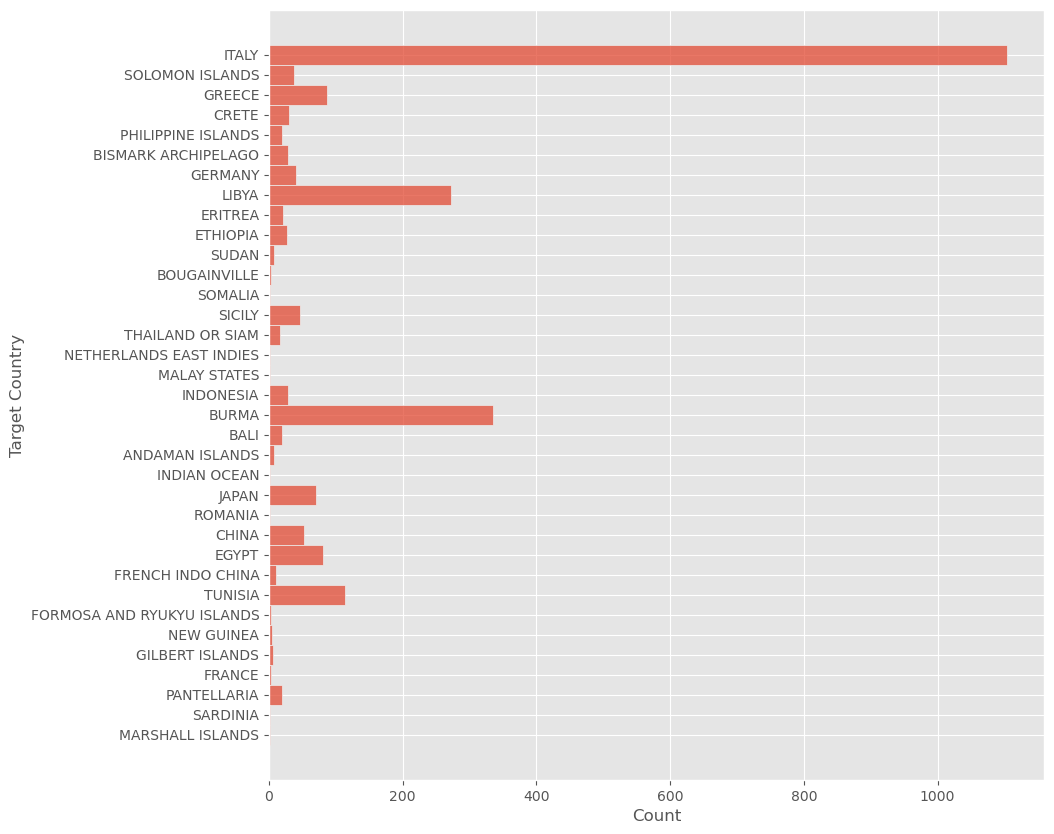

In [83]:
plt.figure(figsize=(10,10))
sns.histplot(
    data = aerial,
    y = 'Target Country',
)

In [93]:
top10_aircraft = aerial['Aircraft Series'].value_counts()[:10]
top10_aircraft

Aircraft Series
A36             990
B25             416
B24             337
BLEN            180
LIB             145
WELL            129
B17             119
PV-1 VENTURA     70
WHIT             32
HALI             18
Name: count, dtype: int64

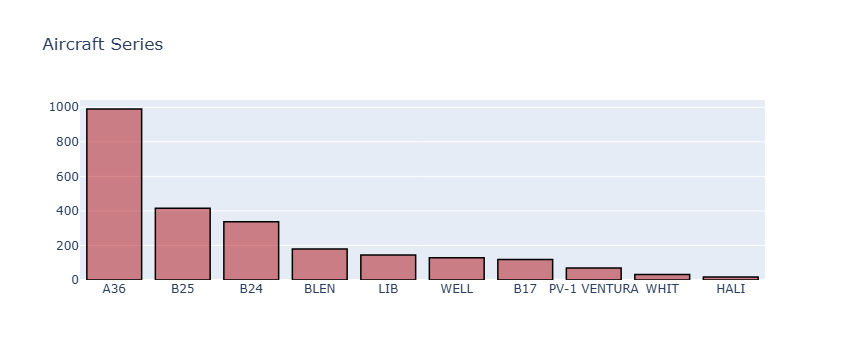

In [111]:
data = [go.Bar(
    x = top10_aircraft.index,
    y = top10_aircraft.values,
    hoverinfo = 'text',
    marker = dict(color = 'rgba(177, 14, 22, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
    
)]
layout = dict(
    title = 'Aircraft Series',
)

fig = go.Figure(data=data, layout=layout
               )
iplot(fig)

<Axes: xlabel='Aircraft Series'>

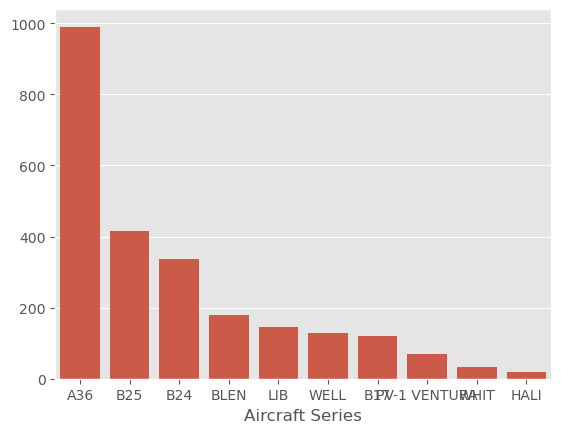

In [113]:
sns.barplot(
    x = top10_aircraft.index,
    y = top10_aircraft.values,
)


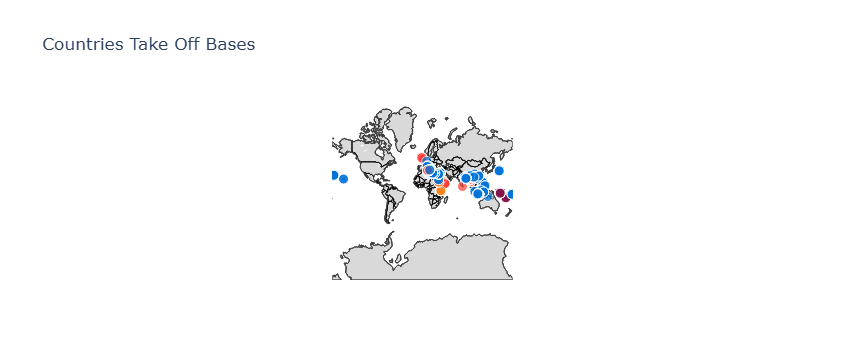

In [117]:
#Attack countries

aerial["color"] = ''
aerial.color[aerial.Country == "USA"] = "rgb(0,116,217)"
aerial.color[aerial.Country == "GREAT BRITAIN"] = "rgb(255,65,54)"
aerial.color[aerial.Country == "NEW ZEALAND"] = "rgb(133,20,75)"
aerial.color[aerial.Country == "SOUTH AFRICA"] = "rgb(255,133,27)"

data = [dict(
    type='scattergeo',
    lon = aerial['Takeoff Longitude'],
    lat = aerial['Takeoff Latitude'],
    hoverinfo = 'text',
    text = "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " + aerial['Takeoff Base'],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 10 ,
        line = dict(width=1,color = "white"),
        color = aerial["color"],
        opacity = 0.7),
)]
layout = dict(
    title = 'Countries Take Off Bases ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

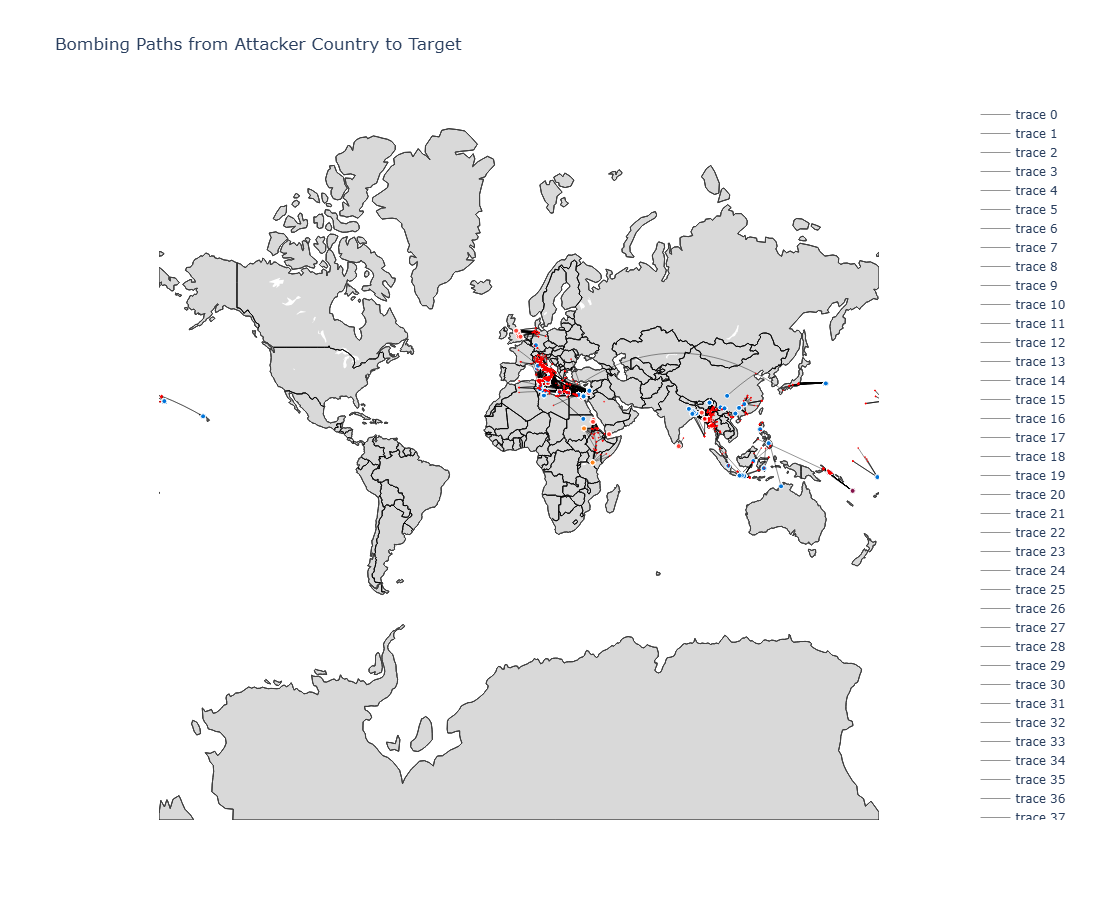

In [137]:
# Bombing paths
# trace1
airports = [ dict(
        type = 'scattergeo',
        lon = aerial['Takeoff Longitude'],
        lat = aerial['Takeoff Latitude'],
        hoverinfo = 'text',
        text = "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " + aerial['Takeoff Base'],
        mode = 'markers',
        marker = dict( 
            size=5, 
            color = aerial["color"],
            line = dict(
                width=1,
                color = "white"
            )
        ))]
# trace2
targets = [ dict(
        type = 'scattergeo',
        lon = aerial['Target Longitude'],
        lat = aerial['Target Latitude'],
        hoverinfo = 'text',
        text = "Target Country: "+aerial["Target Country"]+" Target City: "+aerial["Target City"],
        mode = 'markers',
        marker = dict( 
            size=1, 
            color = "red",
            line = dict(
                width=0.5,
                color = "red"
            )
        ))]
        
# trace3
flight_paths = []
for i in range( len( aerial['Target Longitude'] ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            lon = [ aerial.iloc[i,9], aerial.iloc[i,16] ],
            lat = [ aerial.iloc[i,8], aerial.iloc[i,15] ],
            mode = 'lines',
            line = dict(
                width = 0.7,
                color = 'black',
            ),
            opacity = 0.6,
        )
    )
    
layout = dict(
    title = 'Bombing Paths from Attacker Country to Target ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)"),
    width = 1500,
    height = 900
)
    
fig = dict( data=flight_paths + airports+targets, layout=layout )
iplot( fig )

<Axes: xlabel='count', ylabel='Theater of Operations'>

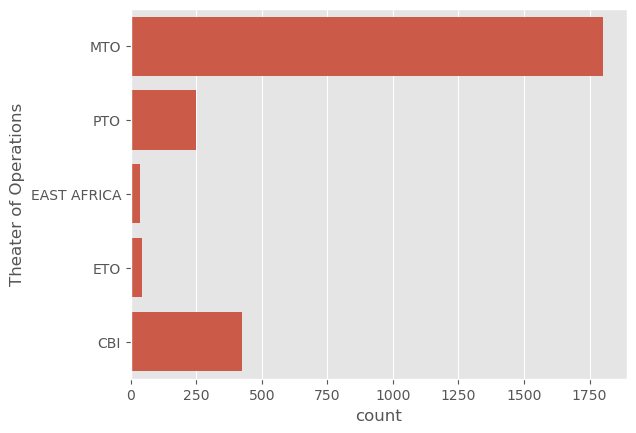

In [127]:
#Theater of operations
aerial['Theater of Operations'].value_counts()

sns.countplot(aerial['Theater of Operations'])

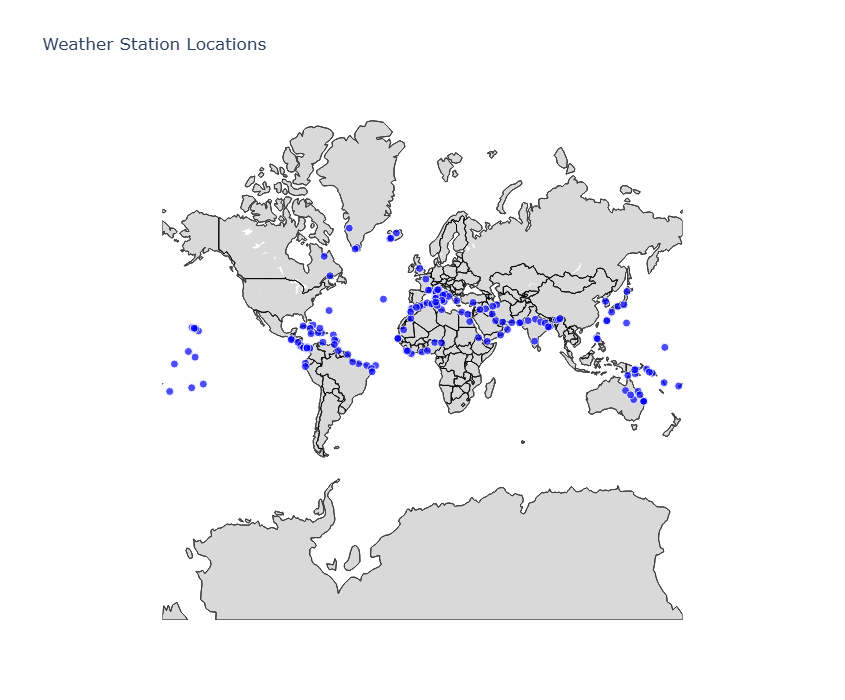

In [135]:
data = [dict(
    type='scattergeo',
    lon = weather_station_location.Longitude,
    lat = weather_station_location.Latitude,
    hoverinfo = 'text',
    text = "Name: " + weather_station_location.NAME + " Country: " + weather_station_location["STATE/COUNTRY ID"],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 8 ,
        line = dict(width=1,color = "white"),
        color = "blue",
        opacity = 0.7),
)]
layout = dict(
    title = 'Weather Station Locations ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)"),
                width=1200,
                height=700
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [141]:
weather_station_id = weather_station_location[weather_station_location.NAME == "BINDUKURI"].WBAN 
weather_station_id

70    32907
Name: WBAN, dtype: int64

<Axes: xlabel='Date', ylabel='MeanTemp'>

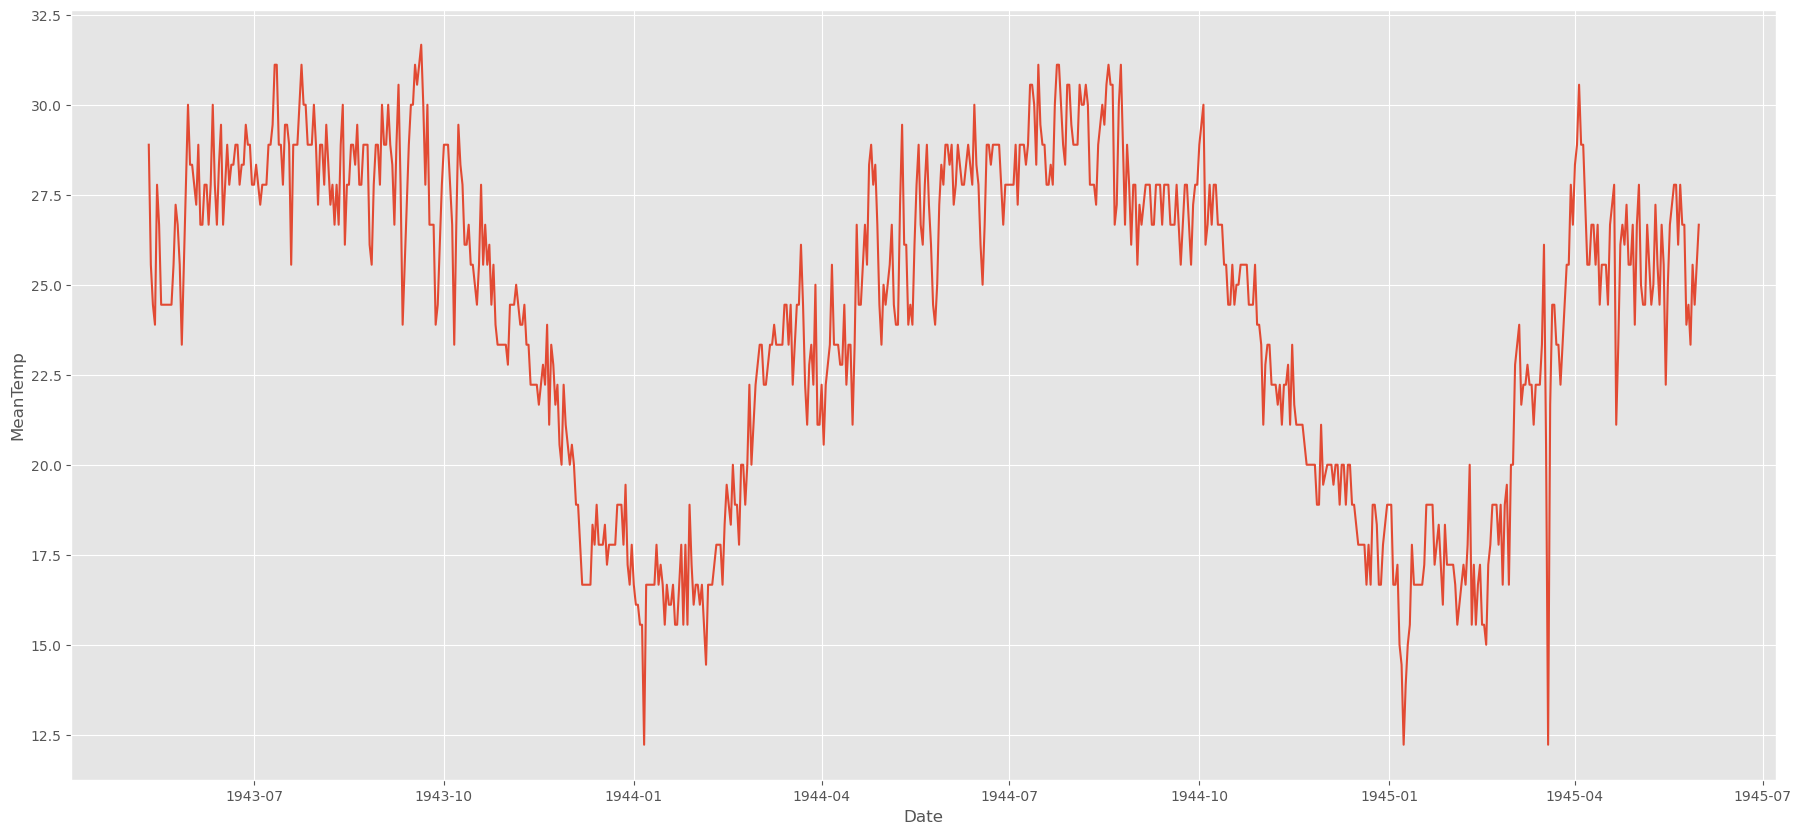

In [147]:
weather_bin = weather[weather.STA == 32907]
plt.figure(figsize=(22,10))
sns.lineplot(data = weather_bin,
            x = 'Date',
             y = 'MeanTemp'
            )

In [157]:
aerial['Mission Date'] = pd.to_datetime(aerial['Mission Date'])
aerial["month"] = aerial['Mission Date'].dt.month
aerial["year"] = aerial['Mission Date'].dt.year


Mission Date Theater of Operations        Country Air Force  \
0        1943-08-15                   MTO            USA     12 AF   
2        1943-08-15                   MTO            USA     12 AF   
3        1943-08-15                   MTO            USA     12 AF   
8        1943-08-15                   MTO            USA     12 AF   
9        1943-08-15                   MTO            USA     12 AF   
...             ...                   ...            ...       ...   
178032   1943-08-14                   MTO            USA     12 AF   
178033   1943-08-14                   MTO            USA     12 AF   
178034   1943-08-14                   MTO            USA     12 AF   
178035   1943-08-14                   MTO  GREAT BRITAIN       RAF   
178080   1943-08-15                   MTO            USA     12 AF   

       Aircraft Series Callsign          Takeoff Base Takeoff Location  \
0                  A36      NaN  PONTE OLIVO AIRFIELD           SICILY   
2                  A36      NaN  PONTE OLIVO AIRFIELD           SICILY   
3                  A36      NaN  PONTE OLIVO AIRFIELD           SICILY   
8                  A36      NaN  PONTE OLIVO AIRFIELD           SICILY   
9                  A36      NaN  PONTE OLIVO AIRFIELD           SICILY   
...                ...      ...                   ...              ...   
178032             A36      NaN  PONTE OLIVO AIRFIELD           SICILY   
178033             A36      NaN  PONTE OLIVO AIRFIELD           SICILY   
178034             A36      NaN  PONTE OLIVO AIRFIELD           SICILY   
178035             LIB      NaN                 OUDNA          TUNISIA   
178080             A36      NaN  PONTE OLIVO AIRFIELD           SICILY   

       Takeoff Latitude  Takeoff Longitude Target Country   Target City  \
0             37.131022          14.321464          ITALY     SPADAFORA   
2             37.131022          14.321464          ITALY       COSENZA   
3             37.131022          14.321464          ITALY   GIOJA TAURO   
8             37.131022          14.321464          ITALY        SCILLA   
9             37.131022          14.321464          ITALY   GIOJA TAURO   
...                 ...                ...            ...           ...   
178032        37.131022          14.321464          ITALY     SPADAFORA   
178033        37.131022          14.321464          ITALY       MILAZZO   
178034        37.131022          14.321464          ITALY       ORLANDO   
178035        36.649608          10.121936         GREECE  SAN GIOVANNI   
178080        37.131022          14.321464          ITALY        SCILLA   

       Target Type               Target Industry Target Priority  \
0              NaN                           NaN             NaN   
2              NaN                           NaN             NaN   
3              NaN                           NaN             NaN   
8              NaN                           NaN             NaN   
9              NaN  ARMAMENT AND ORDNANCE PLANTS             NaN   
...            ...                           ...             ...   
178032         NaN                           NaN             NaN   
178033         NaN                           NaN             NaN   
178034         NaN                           NaN             NaN   
178035         NaN                           NaN             NaN   
178080         NaN                           NaN             NaN   

        Target Latitude  Target Longitude           color  month  year  
0                 38.22             15.37  rgb(0,116,217)      8  1943  
2                 39.27             16.25  rgb(0,116,217)      8  1943  
3                 38.43             15.90  rgb(0,116,217)      8  1943  
8                 38.23             15.72  rgb(0,116,217)      8  1943  
9                 38.43             15.90  rgb(0,116,217)      8  1943  
...                 ...               ...             ...    ...   ...  
178032            38.22             15.37  rgb(0

In [219]:
aerial = pd.read_csv("WW2_Data/operations.csv")
aerial['Mission Date'] = pd.to_datetime(aerial['Mission Date'])
aerial["month"] = aerial['Mission Date'].dt.month
aerial["year"] = aerial['Mission Date'].dt.year

attack = "USA"
target = "BURMA"
city = "KATHA"

start = pd.Timestamp("1943-08-01")

mask = (
    (aerial["Mission Date"] >= start)
    &(aerial["Country"] == attack) 
    &(aerial["Target Country"] == target) 
    &(aerial["Target City"] == city)
)

aerial_war = aerial.loc[mask].copy()
aerial_war

Mission ID Mission Date Theater of Operations Country Air Force  \
3740          3741   1944-08-02                   CBI     USA     10 AF   
10023        10024   1943-09-20                   CBI     USA     10 AF   
10938        10939   1943-09-24                   CBI     USA     10 AF   
10942        10943   1943-09-24                   CBI     USA     10 AF   
15076        15077   1943-10-19                   CBI     USA     10 AF   
18990        18991   1943-11-12                   CBI     USA     10 AF   
20891        20892   1944-08-17                   CBI     USA     10 AF   
21144        21145   1944-08-18                   CBI     USA     10 AF   
21145        21146   1944-08-18                   CBI     USA     10 AF   
21147        21148   1944-08-18                   CBI     USA     10 AF   
24428        24429   1943-12-06                   CBI     USA     10 AF   
24446        24447   1943-12-06                   CBI     USA     10 AF   
24447        24448   1943-12-06                   CBI     USA     10 AF   
24483        24484   1943-12-07                   CBI     USA     10 AF   
24497        24498   1943-12-07                   CBI     USA     10 AF   
29396        29397   1944-08-29                   CBI     USA     10 AF   
34375        34376   1944-09-06                   CBI     USA     10 AF   
35569        35570   1944-09-08                   CBI     USA     10 AF   
41328        41329   1944-09-12                   CBI     USA     10 AF   
41332        41333   1944-09-12                   CBI     USA     10 AF   
43754        43755   1944-09-17                   CBI     USA     10 AF   
51899        51994   1944-09-27                   CBI     USA     10 AF   
59131        59263   1944-10-04                   CBI     USA     10 AF   
59148        59280   1944-10-04                   CBI     USA     10 AF   
59149        59281   1944-10-04                   CBI     USA     10 AF   
59153        59285   1944-10-04                   CBI     USA     10 AF   
64847        65002   1944-10-09                   CBI     USA     10 AF   
66959        67122   1944-03-29                   CBI     USA     10 AF   
67389        67554   1944-03-30                   CBI     USA     10 AF   
74871        75096   1944-10-20                   CBI     USA     10 AF   
75173        75403   1944-10-20                   CBI     USA     10 AF   
82524        82882   1944-10-30                   CBI     USA     10 AF   
82847        83210   1944-10-31                   CBI     USA     10 AF   
84256        84624   1944-04-25                   CBI     USA     10 AF   
112939      113400   1944-05-28                   CBI     USA     10 AF   
116386      116847   1944-05-30                   CBI     USA     10 AF   
138743      139204   1944-12-28                   CBI     USA     10 AF   
174745      175207   1943-08-01                   CBI     USA     10 AF   
174746      175208   1943-08-01                   CBI     USA     10 AF   
174749      175211   1943-08-01                   CBI     USA     10 AF   
174750      175212   1943-08-01                   CBI     USA     10 AF   

       Unit ID Aircraft Series Callsign Mission Type Takeoff Base  ...  \
3740    528 FS             P51      NaN           10          NaN  ...   
10023   490 BS             B25      NaN            1          NaN  ...   
10938    22 BS             B25      NaN            1          NaN  ...   
10942    22 BS             B25      NaN            1          NaN  ...   
15076    22 BS             B25      NaN            1          NaN  ...   
18990    90 FS             P40      NaN          3.0          NaN  ...   
20891   490 BS             B25      NaN          1.0          NaN  ...   
21144    88 FS             P47      NaN         10.0          NaN  ...   
21145    88 FS             P47      NaN         10.0          NaN  ...   
21147    88 FS             P47      NaN         10.0          NaN  ...   
24428   529 BS             B25      NaN    

In [207]:
weather_bin['Date'] = pd.to_datetime(weather_bin["Date"])

In [221]:
aerial_war = aerial_war.merge(
    weather_bin[["Date", "MeanTemp"]],
    left_on = "Mission Date",
    right_on = "Date",
    how = "left"
)

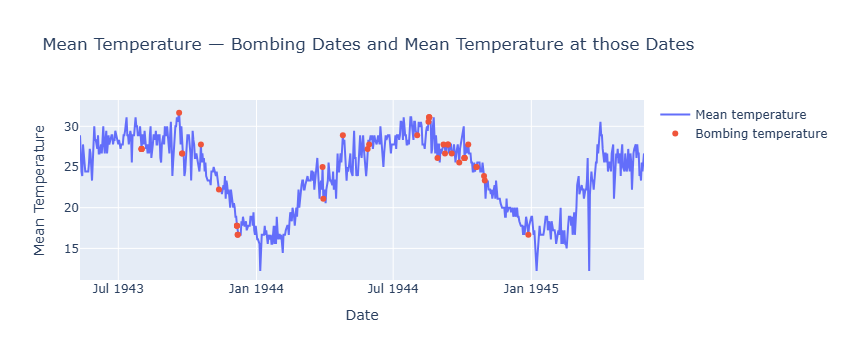

In [223]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = weather_bin["Date"],
    y = weather_bin["MeanTemp"],
    mode = "lines",
    name = "Mean temperature"
))

fig.add_trace(go.Scatter(
    x = aerial_war["Mission Date"],
    y = aerial_war["MeanTemp"],
    mode = "markers",
    name = "Bombing temperature"
))

fig.update_layout(
    title="Mean Temperature — Bombing Dates and Mean Temperature at those Dates",
    xaxis_title="Date",
    yaxis_title="Mean Temperature"
)

iplot(fig)

USA tends to bomb at higher temperatures. In order to have an idea whether a bombing will take place or not it can be useful to predict temperature data

In [228]:
timeSeries = weather_bin.loc[:, ["Date", "MeanTemp"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date", axis = 1)

In [230]:
#Check stationarity with augmented dickey fuller test
from statsmodels.tsa.stattools import adfuller


In [238]:
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
# check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(window=6).mean()
    rolstd = ts.rolling(window=6).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()

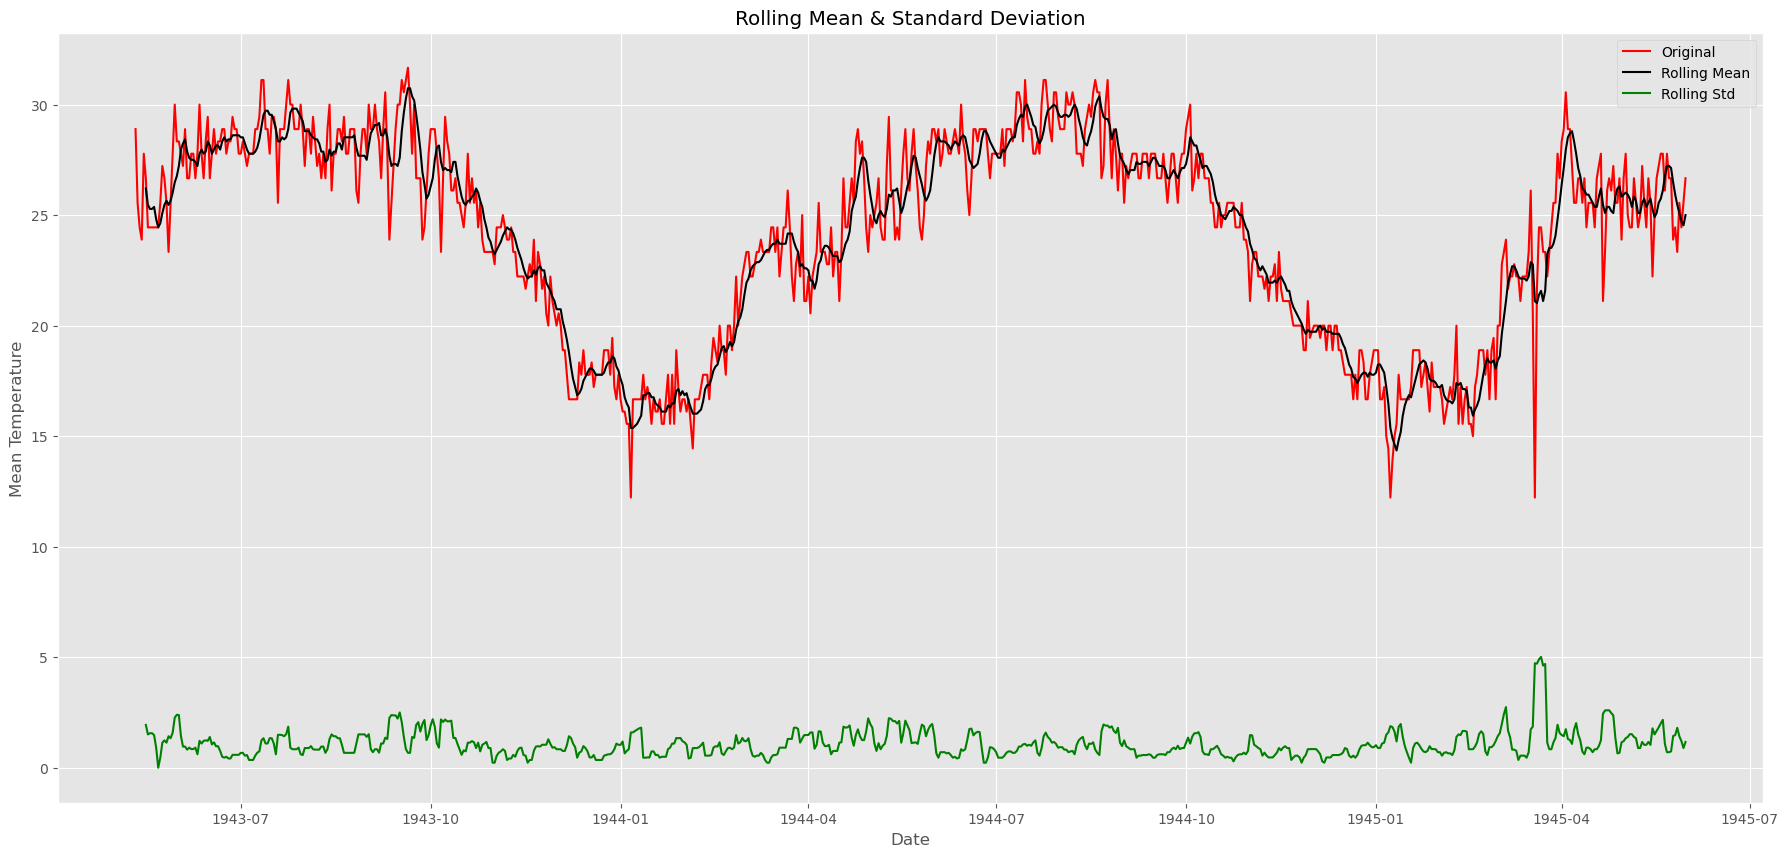

Test statistic:  -1.4095966745887694
p-value:  0.5776668028526387
Critical Values: {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


In [240]:
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts)
check_adfuller(ts.MeanTemp)

In [242]:
window_size = 6
moving_avg = ts.rolling(window_size).mean()

ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace = True)

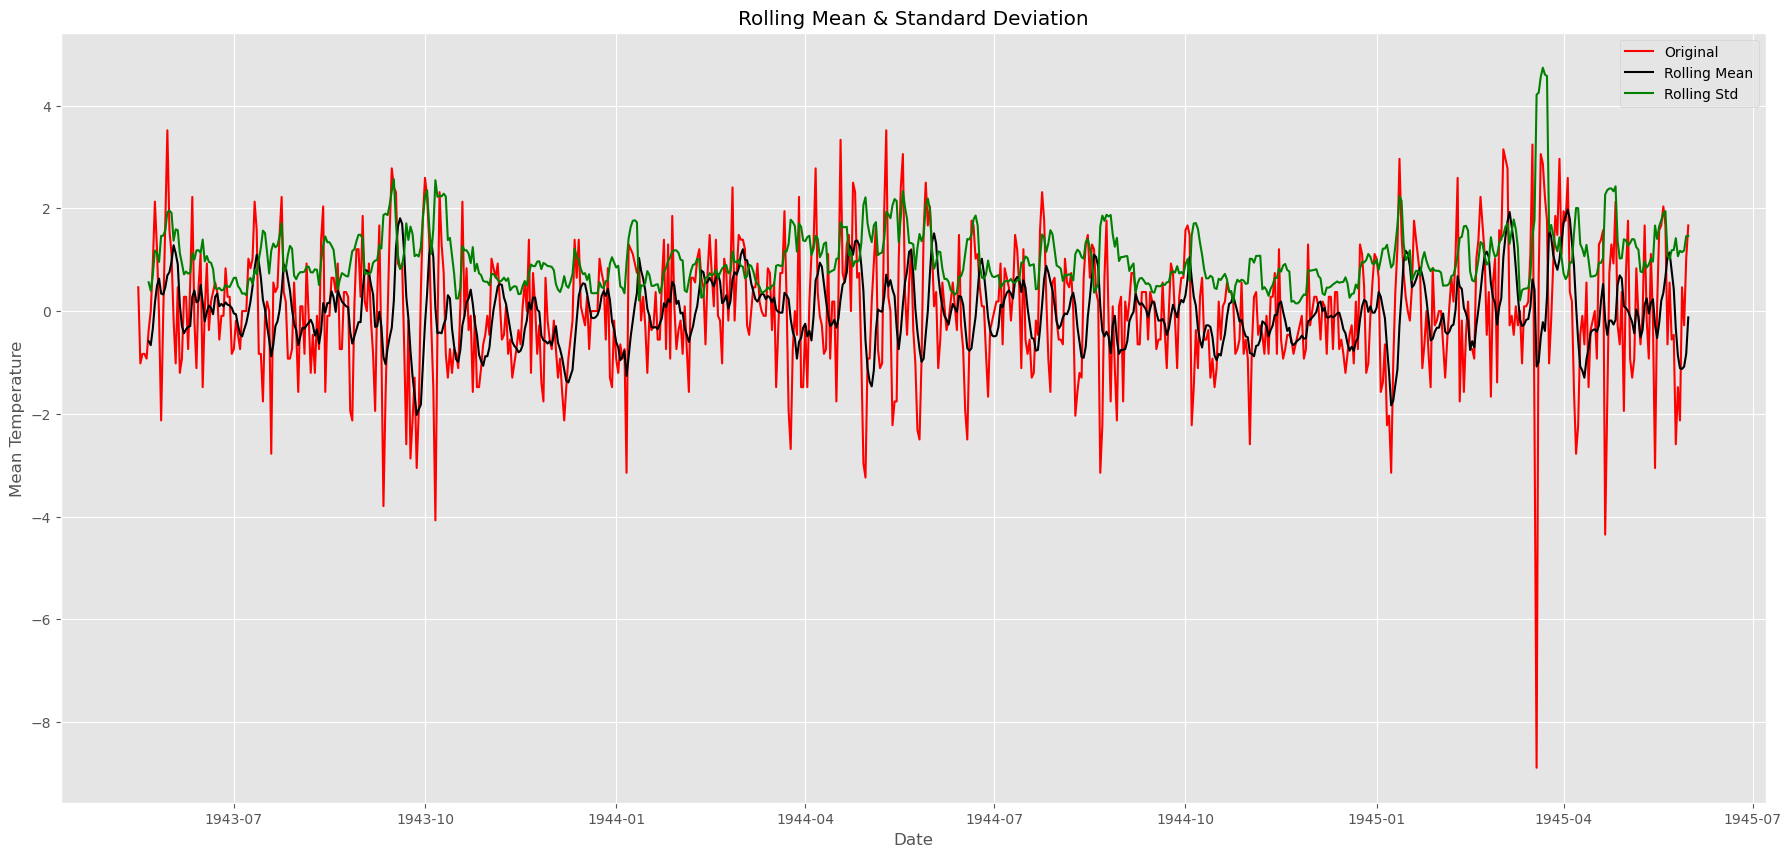

Test statistic:  -11.138514335138506
p-value:  3.150868563164064e-20
Critical Values: {'1%': -3.4392539652094154, '5%': -2.86546960465041, '10%': -2.5688625527782327}


In [246]:
check_mean_std(ts_moving_avg_diff)
check_adfuller(ts_moving_avg_diff)

From the above we can observe that our new time series is very likely to be a stationary time series.
There is another step to be done in case this doesn't work. That is the differencing method

<Axes: xlabel='Date'>

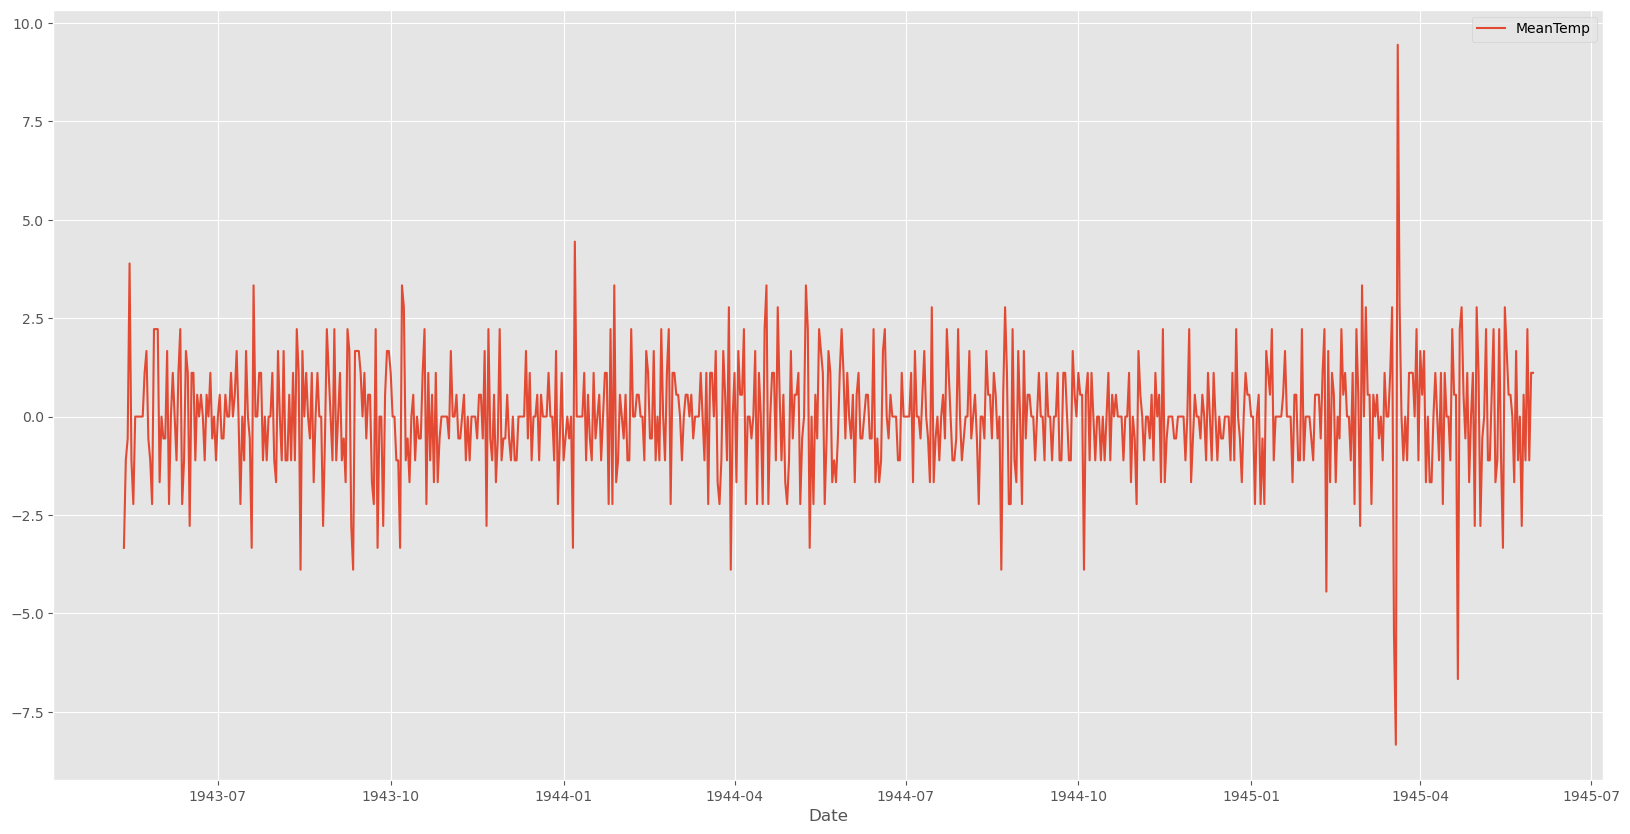

In [255]:
ts_diff = ts - ts.shift()
plt.figure(figsize = (20,10))
sns.lineplot(ts_diff)

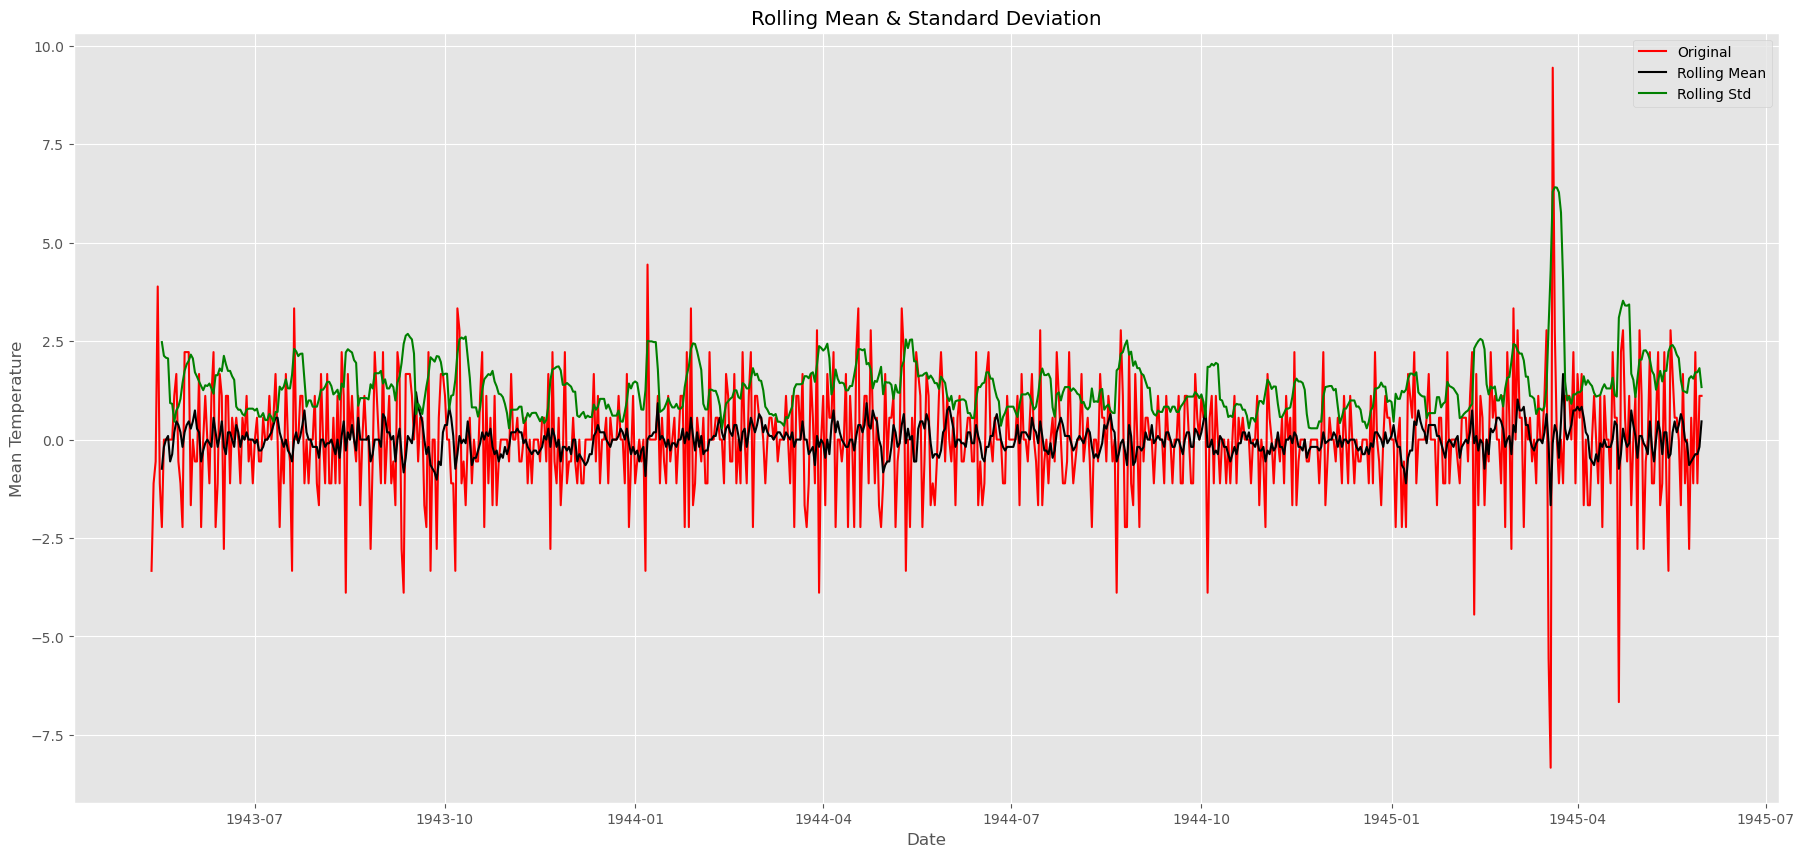

Test statistic:  -11.678955575105357
p-value:  1.7602075693560356e-21
Critical Values: {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


In [257]:
ts_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_diff)
check_adfuller(ts_diff.MeanTemp)

Arima(p,d,q) (p: autoregressive terms, d: differencing term, q: MA term how many past forecast errors (shocks) to use when predicting the current value
In order to determine p and q we look at the ACF and PACF functions

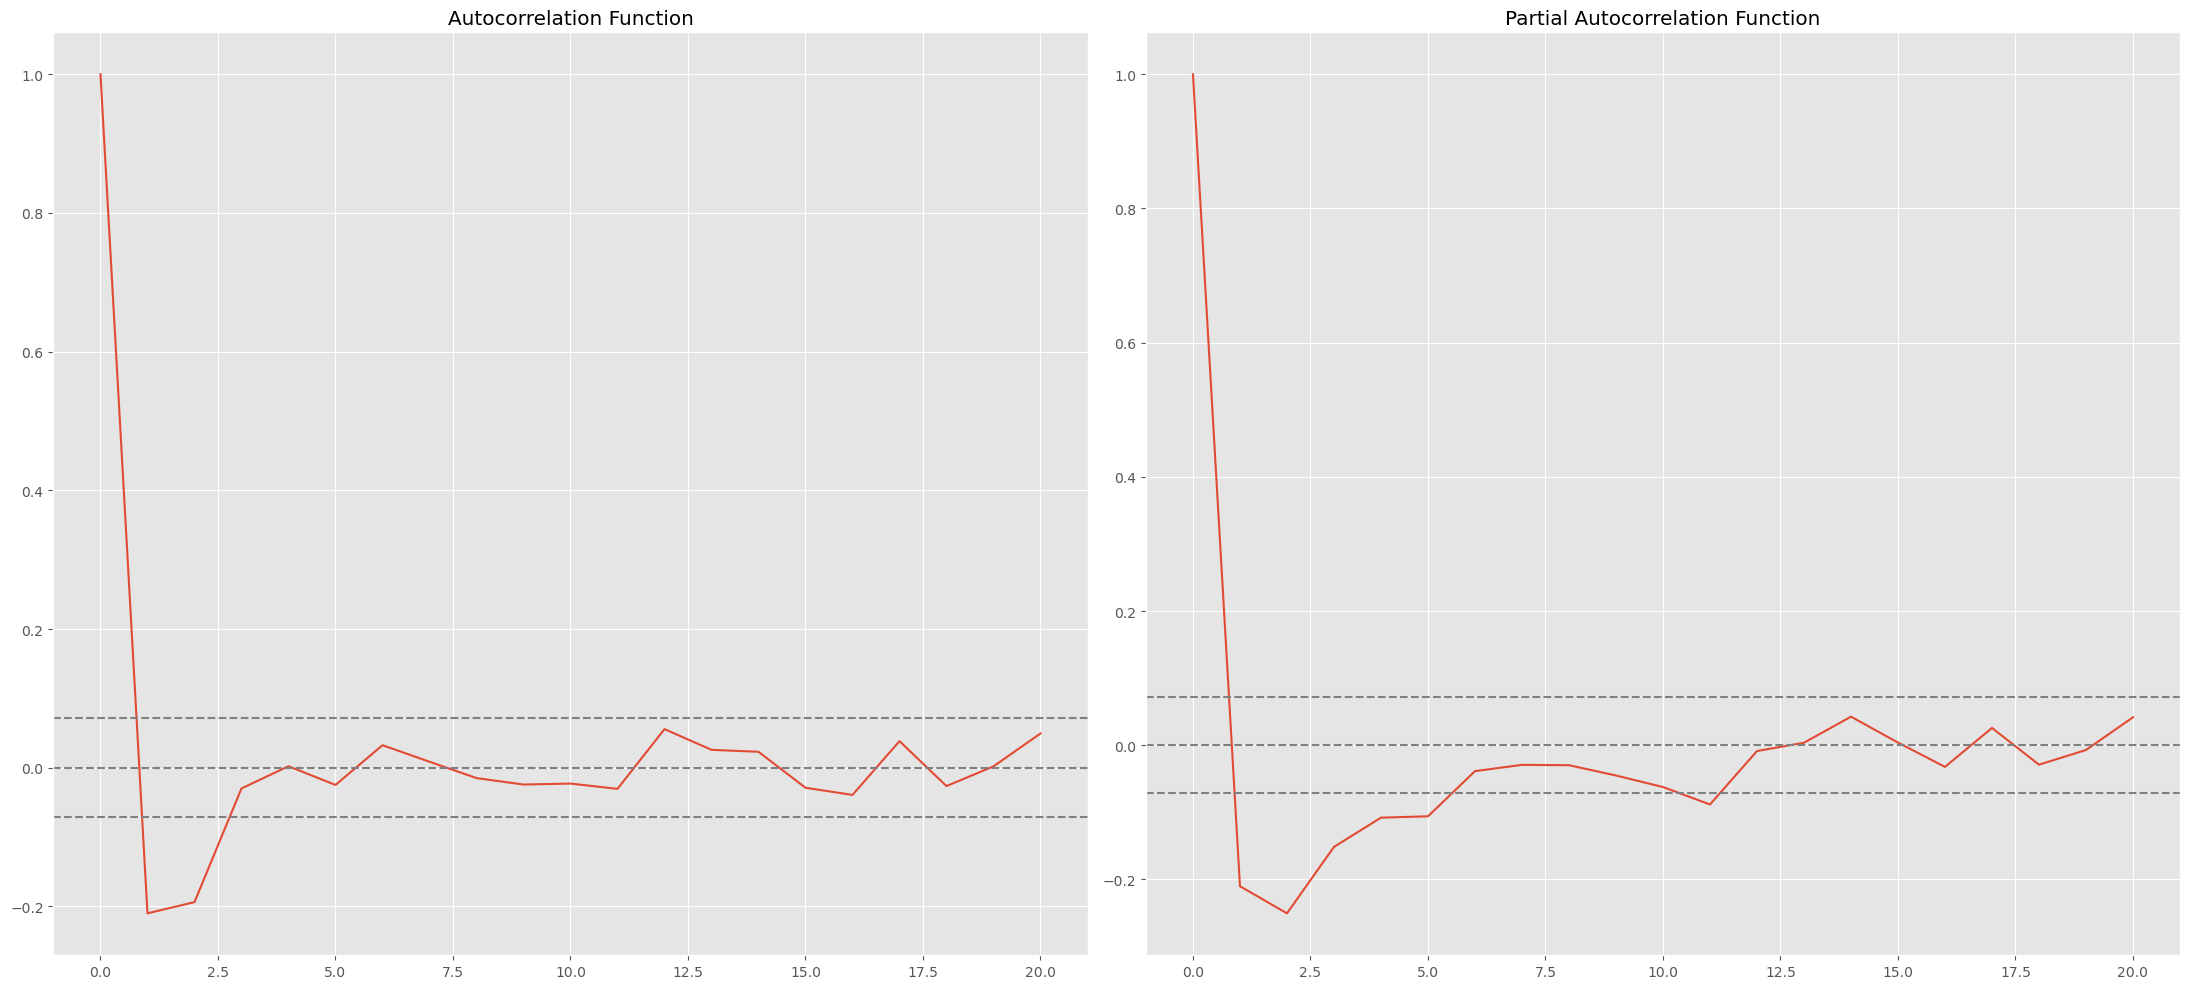

In [260]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')

plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [318]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ts, order=(0,1,2))
model_fit = model.fit()

start_index = pd.Timestamp("1944-06-25")
end_index = pd.Timestamp("1945-05-31")
forecast = model_fit.predict(start=start_index, end=end_index)


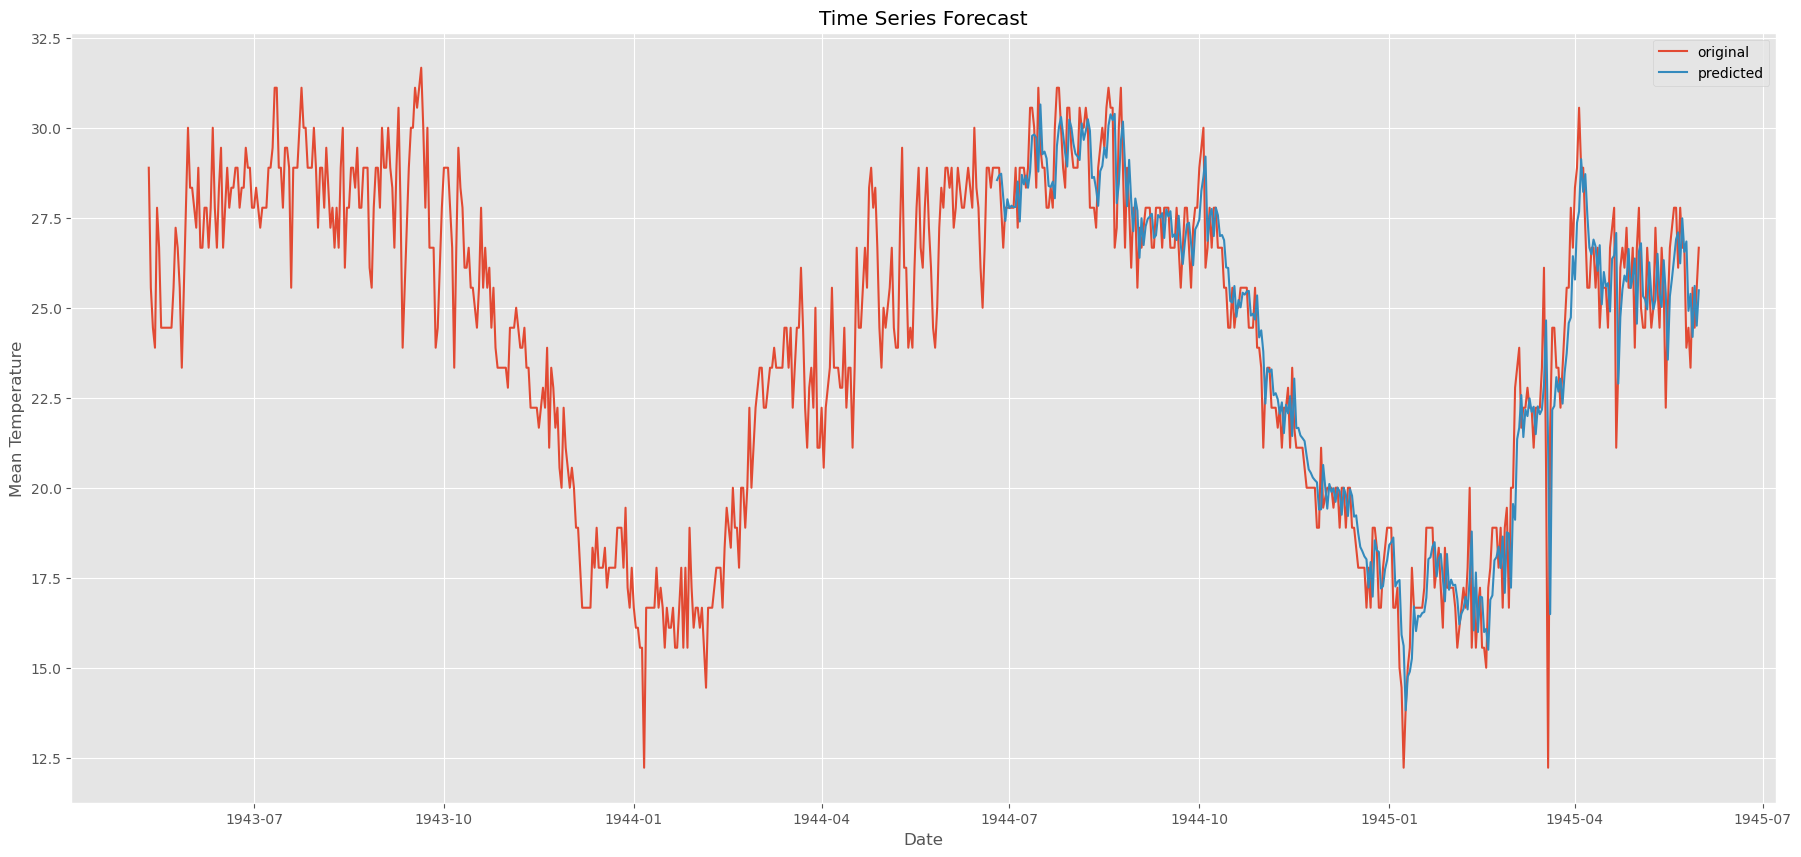

In [320]:

plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp,label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

In [322]:
error = mean_squared_error(ts.loc[start_index:end_index], forecast)
error

1.8617561256471487

# AutoArima Testing

Best practice workflow (recommended)

1. Naive / seasonal naive baseline
2. autoARIMA → candidate (p,d,q)
3. Fit a small grid around that choice
4. Validate via rolling forecasts
5. Check residual autocorrelation
6. Keep the simplest model that works

In [330]:
from pmdarima import auto_arima

model = auto_arima(
    ts,
    seasonal=True,
    stepwise=True,
    trace=True,
    information_criterion = 'oob'
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2551.493, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2666.633, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2634.593, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2597.168, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2664.636, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2549.494, Time=0.53 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2549.132, Time=0.34 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2549.511, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2552.751, Time=0.44 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2551.528, Time=0.42 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2547.137, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2595.172, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2547.498, Time=0.21 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=2547.516, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]          

In [326]:
auto_arima?

Signature:
auto_arima(
    y,
    X=None,
    start_p=2,
    d=None,
    start_q=2,
    max_p=5,
    max_d=2,
    max_q=5,
    start_P=1,
    D=None,
    start_Q=1,
    max_P=2,
    max_D=1,
    max_Q=2,
    max_order=5,
    m=1,
    seasonal=True,
    stationary=False,
    information_criterion='aic',
    alpha=0.05,
    test='kpss',
    seasonal_test='ocsb',
    stepwise=True,
    n_jobs=1,
    start_params=None,
    trend=None,
    method='lbfgs',
    maxiter=50,
    offset_test_args=None,
    seasonal_test_args=None,
    suppress_warnings=True,
    error_action='trace',
    trace=False,
    random=False,
    random_state=None,
    n_fits=10,
    return_valid_fits=False,
    out_of_sample_size=0,
    scoring='mse',
    scoring_args=None,
    with_intercept='auto',
    sarimax_kwargs=None,
    **fit_args,
)
Docstring:
Automatically discover the optimal order for an ARIMA model.

The auto-ARIMA process seeks to identify the most optimal
parameters for an ``ARIMA`` model, settling on a

ValueError: x and y must have same first dimension, but have shapes (1,) and (751, 1)

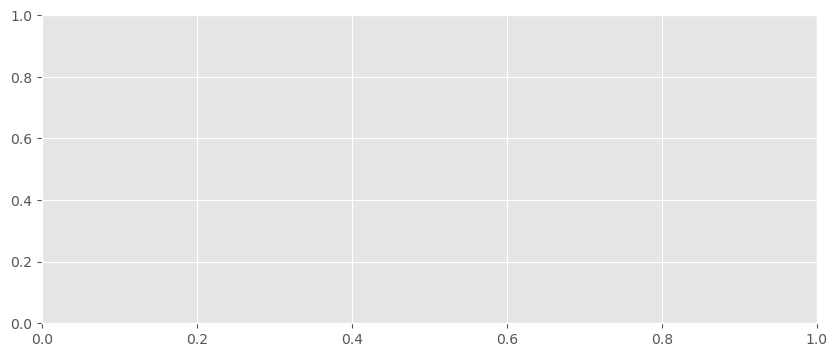

In [336]:
from scipy.signal import periodogram
freqs, power = periodogram(ts)

plt.figure(figsize=(10,4))
plt.plot(freqs, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.title("Periodogram")
plt.show()